In [5]:
!pip install pandas

!pip install seaborn
!pip install numpy

!pip install matplotlib

!pip install scikit-learn

In [4]:
!pip install scipy

In [127]:
import matplotlib.pyplot as plt

import matplotlib

import seaborn as sns

import numpy as np
import numpy.linalg as np_la

import pandas as pd

from sklearn import neighbors, metrics

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from collections import Counter

import re

from sklearn.covariance import EllipticEnvelope

from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

# functions

In [128]:
def get_metrics(targets: np.ndarray, predicted_targets: np.ndarray, mode: str):
    '''

    :param targets:
    :param predicted_targets:
    :param mode: influence to return: mode = "show_metrics" - print metrics to the Console;
                                        mode = "return_metrics" - return dict which consists all metrics values
                                        with their names as keys
    :return:
    {
    "accuracy": accuracy_value, "precision": precision_value,
    "recall": recall_value, "f1_score": f1_score_value,
    "confusion_matrix": confusion_matrix
    }
    '''
    # token = (actual target, predicted target)
    # 1 - positive target, 0 - negative target
    tokens = [(j, i) for i in [1, 0] for j in [1, 0]]
    # tokens = [true_pos_token,
    #           false_pos_token,
    #           false_neg_token,
    #           true_neg_token]
    c = Counter(zip(targets, predicted_targets))
    [true_pos_value,
     false_pos_value,
     false_neg_value,
     true_neg_value] = [c[token] for token in tokens]
    accuracy = (true_neg_value + true_pos_value) / len(targets)
    confusion_matrix = np.array([[true_pos_value, false_pos_value],
                                 [false_neg_value, true_neg_value]])
    precision = true_pos_value / (true_pos_value + false_pos_value)
    recall = true_pos_value / (true_pos_value + false_neg_value)
    f1_score = 2 * precision * recall / (precision + recall)
    if mode == "show_metrics":
        print(f"accuracy = {accuracy}")
        print(f"confusion_matrix = \n{confusion_matrix}")
        print(f"precision = {precision}")
        print(f"recall = {recall}")
        print(f"f1_score = {f1_score}")
    elif mode == "return_metrics":
        res_dict = {"accuracy": accuracy, "confusion_matrix": confusion_matrix,
                    "f1_score": f1_score}
        return res_dict

In [118]:
preproc_data = pd.read_csv("pre-processing_BankChurners.csv")
preproc_data_x = preproc_data.drop(["Attrition_Flag",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
                       ], axis=1)
x = preproc_data_x.values
y = preproc_data["Attrition_Flag"].values
preproc_data_x

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165261,1.060261,0.503636,-0.893897,0.522808,0.425471,-0.263546,0.384495,0.763915,-1.327615,0.492010,0.447062,-0.473285,0.489410,2.666758,-0.960392,-0.975049,3.892696,-0.776043
1,0.583481,1.060261,0.503636,0.593115,0.522808,1.308928,-0.263546,0.008956,0.120645,-1.327615,-2.220431,-0.573420,-1.426735,-0.445377,8.499347,-0.741457,-1.913197,6.910076,-0.997334
2,-0.789213,-0.943070,1.273662,-0.893897,0.522808,-0.850632,-0.263546,-0.241404,-0.522625,1.643518,-1.316284,-0.584975,1.661853,-0.733868,2.991048,-0.952436,-1.913197,6.910076,1.759732
3,-0.789213,1.060261,0.503636,-1.637403,0.522808,0.425471,-0.263546,-1.868743,0.763915,-1.327615,-2.220431,-0.430577,-1.426735,-0.302563,6.558239,-1.057042,-1.572052,7.621803,-0.997334
4,-0.290051,1.060261,-0.266389,0.593115,0.522808,-0.163500,-0.263546,0.008956,-0.522625,-1.327615,-0.412137,-0.508271,0.103448,-0.517445,2.856699,-0.976893,-1.742625,0.572725,0.130886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,0.458691,1.060261,-0.266389,0.593115,-1.135236,-0.163500,-0.263546,0.509675,-0.522625,-0.337237,0.492010,-0.509042,0.844611,-0.584671,-0.261119,3.262728,2.223186,0.619605,0.678672
10116,-0.664422,1.060261,-0.266389,0.593115,2.180853,-0.163500,-0.263546,-1.368023,0.120645,-0.337237,0.492010,-0.478888,1.255686,-0.591383,0.206786,1.284945,0.176316,-0.121955,0.856430
10117,-0.290051,-0.943070,-1.036415,-0.893897,0.522808,-0.850632,-0.263546,0.008956,0.763915,0.653140,1.396157,-0.354313,-1.426735,-0.226314,0.276276,1.734897,-0.207472,0.453393,-0.997334
10118,-2.037116,1.060261,-0.266389,0.593115,0.522808,-0.163500,-0.263546,0.008956,0.120645,0.653140,0.492010,-0.368399,-1.426735,-0.240398,-1.039415,1.176215,-0.122186,0.044257,-0.997334


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# data type identifying

In [3]:

categorical_features = ['Attrition_Flag', 'Gender', 'Marital_Status']
ordinal_features = ["Dependent_count", "Education_Level", "Card_Category",
                "Income_Category", "Total_Relationship_Count",
                "Months_Inactive_12_mon", "Contacts_Count_12_mon"]
numerical_features = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                      'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Customer_Age', 'Months_on_book']

In [160]:
preproc_data = pd.read_csv("pre-processing_BankChurners.csv")
x = preproc_data.drop(["Attrition_Flag",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
                       ], axis=1).values
y = preproc_data["Attrition_Flag"].values

In [18]:
# np_la.matrix_rank(preproc_data_x.values[:100, :])

19

# SVD - singular value decomposition

In [86]:
[U, S, VT] = np_la.svd(x, "econ")

In [87]:
S_diag = np.zeros((U.shape[0], S.shape[0]))
S_diag[:S.shape[0], :S.shape[0]] = np.diag(S)
print(U.shape)
print(S_diag.shape)
print(VT.shape)

(10120, 10120)
(10120, 19)
(19, 19)


In [88]:
(U @ S_diag @ VT)

array([[-0.16526092,  1.0602614 ,  0.50363617, ..., -0.97504856,
         3.89269584, -0.77604319],
       [ 0.5834813 ,  1.0602614 ,  0.50363617, ..., -1.91319734,
         6.91007647, -0.99733402],
       [-0.78921278, -0.94307044,  1.27366155, ..., -1.91319734,
         6.91007647,  1.75973204],
       ...,
       [-0.2900513 , -0.94307044, -1.0364146 , ..., -0.20747229,
         0.45339334, -0.99733402],
       [-2.03711649,  1.0602614 , -0.26638922, ..., -0.12218604,
         0.04425699, -0.99733402],
       [-0.41484167, -0.94307044, -0.26638922, ..., -0.16482917,
        -0.26685712, -0.31169522]])

In [71]:
x

array([[-0.16526092,  1.0602614 ,  0.50363617, ..., -0.97504856,
         3.89269584, -0.77604319],
       [ 0.5834813 ,  1.0602614 ,  0.50363617, ..., -1.91319734,
         6.91007647, -0.99733402],
       [-0.78921278, -0.94307044,  1.27366155, ..., -1.91319734,
         6.91007647,  1.75973204],
       ...,
       [-0.2900513 , -0.94307044, -1.0364146 , ..., -0.20747229,
         0.45339334, -0.99733402],
       [-2.03711649,  1.0602614 , -0.26638922, ..., -0.12218604,
         0.04425699, -0.99733402],
       [-0.41484167, -0.94307044, -0.26638922, ..., -0.16482917,
        -0.26685712, -0.31169522]])

In [114]:
dimensions = [2 ,3, 10]
blured_datas = {}
for r in dimensions:
    blured_datas[r] = (U[:, :r] @ S_diag[:r, :r] @ VT[:r, :])


(10120, 19)

In [130]:
from sklearn.decomposition import TruncatedSVD
dimensions = [2 ,3, 10, 13, 16]
projected_datas = {}
for r in dimensions:
    svd = TruncatedSVD(r)
    projected_datas[r] = svd.fit(x).transform(x)
    print(f"projection dataset on {r} dimension subspace\n"
          f"shape of projection = {projected_datas[r].shape}\n"
          f"projected data = {projected_datas[r]}\n")

projection dataset on 2 dimension subspace
shape of projection = (10120, 2)
projected data = [[ 0.94243518 -0.82002786]
 [ 0.36649584  0.19504429]
 [-2.42078025  1.18323259]
 ...
 [-0.42509758  0.3536134 ]
 [ 0.51861696  0.22700114]
 [ 0.7706424   1.38681791]]

projection dataset on 3 dimension subspace
shape of projection = (10120, 3)
projected data = [[ 0.94251854 -0.81995005 -1.04560387]
 [ 0.36633367  0.1946858  -1.23747602]
 [-2.42121786  1.1815069  -1.15356648]
 ...
 [-0.42506611  0.35364779 -0.01175099]
 [ 0.51859597  0.22712148 -1.22791304]
 [ 0.77072502  1.3879351  -0.83015421]]

projection dataset on 10 dimension subspace
shape of projection = (10120, 10)
projected data = [[ 0.94251131 -0.81981695 -1.04550948 ...  0.38767957 -0.88557397
   0.00458948]
 [ 0.3663479   0.19448395 -1.23759436 ... -1.13776056  0.43027062
  -0.62232444]
 [-2.42123733  1.18181806 -1.15336832 ...  1.92771749  1.95038266
  -1.69310868]
 ...
 [-0.42506975  0.35370645 -0.01171258 ...  1.22513461  0.1343

# visualizing feature in 2D space

d:\onedrive\pythonpr\samsung_knu_2021_practice\2021-knu-churn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

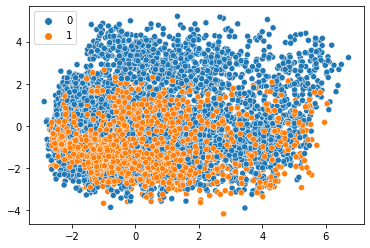

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)
x=[i for i in projected_datas[2][:, 0]]
y_=[i for i in projected_datas[2][:, 1]]
sns.scatterplot(x,y_, hue=y)

# visualizing feature in 3D space

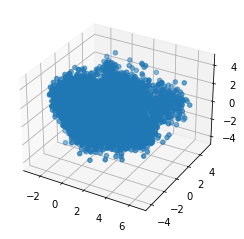

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=[i for i in projected_datas[3][:, 0]]
y=[i for i in projected_datas[3][:, 1]]
z=[i for i in projected_datas[3][:, 2]]
ax.scatter(x,y,zs=z, zdir="z")

# PCA (Principal component analysis)
Approach 2. Using Eigenvalues


In [52]:
print(f"features number: {x.shape[1]}; rank of data: {np_la.matrix_rank(x)}")

features number: 19; rank of data: 18


according to fact that matrix rank less by 1 to number of features,
we have only one combination of linearly dependent vectors(features)

In [9]:
lin_dep_vec_idx = None
for i in range(x.shape[1]):
    x_mod = x[:18, [j for j in range(x.shape[1]) if j != i]]
    if np.abs(np_la.det(x_mod)) > 10**-6:
        lin_dep_vec_idx = i
        break

In [10]:
lin_dep_vec_idx
x_mod = x[:, [j for j in range(x.shape[1]) if j != lin_dep_vec_idx]]
np_la.det(x_mod[:18,:])

-211827.5023703067

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [-0.85844623  1.          0.         ...  0.          0.
   0.        ]
 [-0.22488502  0.65909091  1.         ...  0.          0.
   0.        ]
 ...
 [-0.09817277 -0.42578417 -0.68651979 ...  0.42265982  0.28506204
  -0.3243326 ]
 [-0.68949657  0.90909091  0.4        ...  0.28448891  0.48008271
  -0.49733151]
 [-0.14041019 -0.40305689 -0.48651979 ...  0.25199894  0.20408217
  -0.31354792]]
[[ 2.95449835e+00  1.06026140e+00 -1.80643998e+00 -8.93897138e-01
   5.22808267e-01 -8.50632357e-01 -2.63546299e-01  2.51255300e+00
  -5.22625417e-01 -3.37237210e-01  4.92009662e-01 -5.91688468e-01
   4.07766162e-01 -6.28131857e-01 -8.26309888e-01 -9.35934808e-01
  -2.12641297e+00  6.96318056e-01  6.71416491e-01]
 [ 0.00000000e+00  1.97043880e+00 -3.35717157e+00 -1.74247515

In [11]:
cov_x_matrix = np.cov(x_mod)

In [12]:
L, Q = np_la.eig(cov_x_matrix)

In [18]:
L_diag = np.diag(L)

In [13]:
Q_inv = np_la.inv(Q)

In [94]:
[float(i) for i in L]

Wall time: 10 ms


<timed eval>:1: ComplexWarning: Casting complex values to real discards the imaginary part


[1502.5907058818539,
 1266.5049310682793,
 1052.2026436613387,
 778.4121775099842,
 764.7128771253768,
 631.0130656580066,
 608.222897748221,
 594.4013919884444,
 573.5804139367895,
 549.3274144608085,
 501.2348052033951,
 361.93463019861747,
 250.08265059533863,
 146.41951771063498,
 124.7092790534619,
 108.44946231229522,
 98.8426656516038,
 -9.4176528482174e-14,
 -9.4176528482174e-14,
 -1.3039506639771872e-13,
 -1.3039506639771872e-13,
 -1.7373100735175094e-13,
 -1.7373100735175094e-13,
 1.6789187974819057e-13,
 1.6789187974819057e-13,
 2.0755575828011687e-14,
 2.0755575828011687e-14,
 9.53279057850125e-14,
 9.53279057850125e-14,
 1.6064962700807223e-13,
 1.0860741825431333e-13,
 -1.4979729254895396e-14,
 -1.4979729254895396e-14,
 -9.70622472218196e-14,
 -7.463969556059899e-14,
 4.398095197484344e-14,
 4.398095197484344e-14,
 -4.038726990647483e-14,
 3.455249751567226e-14,
 2.159869904588605e-15,
 2.159869904588605e-15,
 1.6313912733674656e-14,
 1.6313912733674656e-14,
 -2.391175621

In [20]:
A = Q @ L_diag @ Q_inv
A.shape

(10120, 10120)

In [89]:
A

array([[ 1.70986138+6.39723852e-13j,  3.09278686+2.03927029e-12j,
         1.77560588+5.40427843e-13j, ...,  0.14613856-2.16719699e-12j,
        -0.06918928+1.17308588e-12j, -0.35633201-1.52675035e-12j],
       [ 3.09278686+7.33955277e-13j,  7.75351026+4.48491851e-12j,
         3.99403922-6.53810009e-13j, ...,  0.09703869-2.77604655e-13j,
        -0.38611848+6.30064582e-13j, -0.87108396-4.46221891e-12j],
       [ 1.77560588+6.44857847e-13j,  3.99403922+1.33337049e-12j,
         4.37822614+2.98136797e-12j, ..., -0.01277917+3.55981650e-12j,
        -0.36996712-9.38593948e-13j, -0.45040083-7.35256567e-13j],
       ...,
       [ 0.14613856-2.62211297e-13j,  0.09703869+1.26127649e-12j,
        -0.01277917+7.21783723e-13j, ...,  0.7759514 +2.02984576e-13j,
         0.33936111+2.79129897e-13j,  0.33311954-1.07135612e-13j],
       [-0.06918928-3.04470254e-13j, -0.38611848+6.26530514e-13j,
        -0.36996712-1.61981039e-12j, ...,  0.33936111-1.96258276e-12j,
         0.71299472+9.65634182e-13j

In [90]:
cov_x_matrix

array([[ 1.70986138,  3.09278686,  1.77560588, ...,  0.14613856,
        -0.06918928, -0.35633201],
       [ 3.09278686,  7.75351026,  3.99403922, ...,  0.09703869,
        -0.38611848, -0.87108396],
       [ 1.77560588,  3.99403922,  4.37822614, ..., -0.01277917,
        -0.36996712, -0.45040083],
       ...,
       [ 0.14613856,  0.09703869, -0.01277917, ...,  0.7759514 ,
         0.33936111,  0.33311954],
       [-0.06918928, -0.38611848, -0.36996712, ...,  0.33936111,
         0.71299472,  0.12116374],
       [-0.35633201, -0.87108396, -0.45040083, ...,  0.33311954,
         0.12116374,  1.53453925]])

project on the subspace of third dimension

In [38]:
dim_number = 3
base_vectors = Q[:, :dim_number]
base_vectors

array([[ 2.41873441e-03+0.j,  6.45336385e-03+0.j, -1.48387553e-02+0.j],
       [-1.57589345e-03+0.j,  1.29755497e-03+0.j, -2.39992100e-02+0.j],
       [-2.22618496e-02+0.j, -5.21278042e-03+0.j, -2.26964483e-02+0.j],
       ...,
       [ 3.38938695e-05+0.j, -2.97006581e-03+0.j,  3.72793751e-03+0.j],
       [ 8.51128575e-03+0.j, -2.97849504e-03+0.j, -4.03010365e-03+0.j],
       [ 2.02046672e-03+0.j, -9.51556867e-03+0.j, -5.58246291e-03+0.j]])

In [39]:
third_dim_data = cov_x_matrix @ base_vectors


# visualizing feature in 3D space

d:\onedrive\pythonpr\samsung_knu_2021_practice\2021-knu-churn\venv\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
d:\onedrive\pythonpr\samsung_knu_2021_practice\2021-knu-churn\venv\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
d:\onedrive\pythonpr\samsung_knu_2021_practice\2021-knu-churn\venv\lib\site-packages\matplotlib\colors.py:271: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


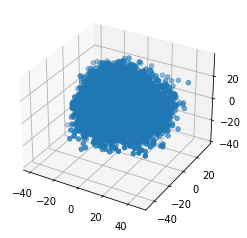

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=[i for i in third_dim_data[:, 0]]
y=[i for i in third_dim_data[:, 1]]
z=[i for i in third_dim_data[:, 2]]
ax.scatter(x,y,zs=z, zdir="z")

project on the subspace of second dimension

In [29]:
dim_number = 2
base_vectors = Q[:, :dim_number]
base_vectors

array([[ 2.41873441e-03+0.j,  6.45336385e-03+0.j],
       [-1.57589345e-03+0.j,  1.29755497e-03+0.j],
       [-2.22618496e-02+0.j, -5.21278042e-03+0.j],
       ...,
       [ 3.38938695e-05+0.j, -2.97006581e-03+0.j],
       [ 8.51128575e-03+0.j, -2.97849504e-03+0.j],
       [ 2.02046672e-03+0.j, -9.51556867e-03+0.j]])

In [122]:
second_dim_data = cov_x_matrix @ base_vectors

array([[  3.63436785+0.j,   8.17321714+0.j, -15.61337753+0.j],
       [ -2.36792286+0.j,   1.64335976+0.j, -25.25203221+0.j],
       [-33.45044824+0.j,  -6.60201211+0.j, -23.88126293+0.j],
       ...,
       [  0.05092861+0.j,  -3.76160299+0.j,   3.92254571+0.j],
       [ 12.78897887+0.j,  -3.77227865+0.j,  -4.24048571+0.j],
       [  3.03593451+0.j, -12.05151464+0.j,  -5.87388223+0.j]])

# visualizing feature in 2D space

d:\onedrive\pythonpr\samsung_knu_2021_practice\2021-knu-churn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\onedrive\pythonpr\samsung_knu_2021_practice\2021-knu-churn\venv\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<AxesSubplot:>

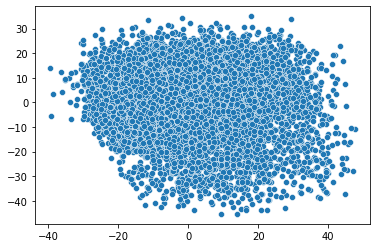

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111)
x=[i for i in second_dim_data[:, 0]]
y=[i for i in second_dim_data[:, 1]]
sns.scatterplot(x,y)

project on the subspace of 10 dimension

In [123]:
dim_number = 10
base_vectors = Q[:, :dim_number]
base_vectors

array([[ 2.41873441e-03+0.j,  6.45336385e-03+0.j, -1.48387553e-02+0.j,
        ...,  6.15994629e-03+0.j,  2.61153474e-03+0.j,
        -1.31966957e-02+0.j],
       [-1.57589345e-03+0.j,  1.29755497e-03+0.j, -2.39992100e-02+0.j,
        ..., -1.08137533e-02+0.j, -7.26464014e-03+0.j,
         2.86297403e-03+0.j],
       [-2.22618496e-02+0.j, -5.21278042e-03+0.j, -2.26964483e-02+0.j,
        ...,  1.52283879e-02+0.j, -2.51965637e-02+0.j,
         1.07140087e-02+0.j],
       ...,
       [ 3.38938695e-05+0.j, -2.97006581e-03+0.j,  3.72793751e-03+0.j,
        ...,  7.57107791e-03+0.j,  1.21146818e-02+0.j,
        -1.09192836e-03+0.j],
       [ 8.51128575e-03+0.j, -2.97849504e-03+0.j, -4.03010365e-03+0.j,
        ..., -7.13837347e-03+0.j,  6.55865859e-03+0.j,
         4.70929763e-03+0.j],
       [ 2.02046672e-03+0.j, -9.51556867e-03+0.j, -5.58246291e-03+0.j,
        ...,  9.68431723e-03+0.j,  8.62668119e-03+0.j,
         4.70726425e-03+0.j]])

In [124]:
ten_dim_data = cov_x_matrix @ base_vectors

In [146]:
matrix = np.zeros(ten_dim_data.shape)
for i in range(ten_dim_data.shape[0]):
        for j in range(ten_dim_data.shape[1]):
            matrix[i, j] = float(ten_dim_data[i, j])
ten_dim_data = matrix
ten_dim_data

<ipython-input-146-19c0c2ed25d8>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  matrix[i, j] = float(ten_dim_data[i, j])


array([[  3.63436785,   8.17321714, -15.61337753, ...,   3.66148065,
          1.49792518,  -7.24930672],
       [ -2.36792286,   1.64335976, -25.25203221, ...,  -6.42771001,
         -4.1668553 ,   1.57271012],
       [-33.45044824,  -6.60201211, -23.88126293, ...,   9.05177498,
        -14.45225546,   5.88549867],
       ...,
       [  0.05092861,  -3.76160299,   3.92254571, ...,   4.50025925,
          6.94874419,  -0.59982618],
       [ 12.78897887,  -3.77227865,  -4.24048571, ...,  -4.24305913,
          3.76191811,   2.58694629],
       [  3.03593451, -12.05151464,  -5.87388223, ...,   5.75637164,
          4.94809537,   2.5858293 ]])

# t-SNE visualization

<AxesSubplot:>

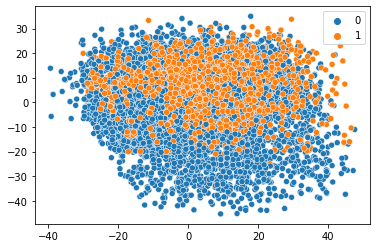

In [150]:
from sklearn.manifold import TSNE
m = TSNE(n_components=2, learning_rate=50)
tsne_2_dim_data = m.fit_transform(x)
tsne_2_dim_data

In [ ]:
sns.scatterplot(x=ten_dim_data[:, 0], y=ten_dim_data[:, 1], hue=y)

# calculate and estimate its efficiency

In [121]:
preproc_data = pd.read_csv("pre-processing_BankChurners.csv")
x = preproc_data.drop(["Attrition_Flag",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                       "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
                       ], axis=1).values
y = preproc_data["Attrition_Flag"].values

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
models = {"RandomForestClassifier": RandomForestClassifier(
    **{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 110}
),
          "KNeighborsClassifier": KNeighborsClassifier(
              **{'n_neighbors': 4, 'weights': 'distance'}
          )}
# models["GaussianNB"] = GaussianNB()

for model in models.items():
    t0 = time.time()
    model[1].fit(x_train, y_train)
    print(f"model: {model[0]} training time = {time.time() - t0}")
    predicted_y = model[1].predict(x_test)
    metrics = get_metrics(targets=y_test, predicted_targets=predicted_y, mode='return_metrics')
    print(f"model: {model[0]} : \n"
          f"f1-score: {metrics['f1_score']} : \n"
          f"accuracy : {metrics['accuracy']}\n")

print("\nFeature creating\n")
for dat_el in {"TruncatedSVD_10_dimention": projected_datas[10],
               "PCA_10_dimention": ten_dim_data,
               "TruncatedSVD_2_dimention": projected_datas[2],
               "TruncatedSVD_3_dimention": projected_datas[3],
               "TruncatedSVD_13_dimention": projected_datas[13],
               "TruncatedSVD_16_dimention": projected_datas[16],
               }.items():
    x_train, x_test, y_train, y_test = train_test_split(dat_el[1], y, test_size=0.3, random_state=0)
    print(f"features are creating and reducing using {dat_el[0]}\n")
    for model in models.items():
        t0 = time.time()
        model[1].fit(x_train, y_train)
        print(f"model: {model[0]} training time = {time.time() - t0}")
        predicted_y = model[1].predict(x_test)
        metrics = get_metrics(targets=y_test, predicted_targets=predicted_y, mode='return_metrics')
        print(f"model: {model[0]} : \n"
              f"f1-score: {metrics['f1_score']} : \n"
              f"accuracy : {metrics['accuracy']}\n")

model: RandomForestClassifier training time = 1.4073379039764404
model: RandomForestClassifier : 
f1-score: 0.8469055374592833 : 
accuracy : 0.9535573122529645

model: KNeighborsClassifier training time = 0.0009975433349609375
model: KNeighborsClassifier : 
f1-score: 0.6476190476190476 : 
accuracy : 0.9025032938076416


Feature creating

features are creating and reducing using TruncatedSVD_10_dimention

model: RandomForestClassifier training time = 2.138115406036377
model: RandomForestClassifier : 
f1-score: 0.5530799475753604 : 
accuracy : 0.8876811594202898

model: KNeighborsClassifier training time = 0.012997865676879883
model: KNeighborsClassifier : 
f1-score: 0.5563549160671464 : 
accuracy : 0.878129117259552

features are creating and reducing using PCA_10_dimention

model: RandomForestClassifier training time = 2.1450250148773193
model: RandomForestClassifier : 
f1-score: 0.4979253112033195 : 
accuracy : 0.8804347826086957

model: KNeighborsClassifier training time = 0.01299786